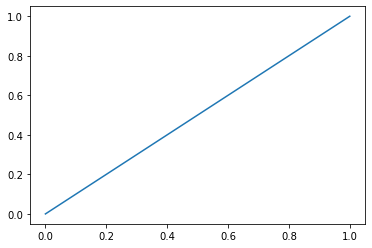

In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1]) # HACK

In [2]:
import torch
import numpy as np
from utils import reimporter
import ptvsd
ptvsd.enable_attach()
reimporter.freeze_modules()

In [7]:
reimporter.reimport()
from data_processing.FDDB_loading import pickle_face_data
from data_processing.FDDB import downloadFDDB
# downloadFDDB()
pickle_face_data(1000)

(900, 1)
(900, 1200)
(100, 1)
(100, 1200)


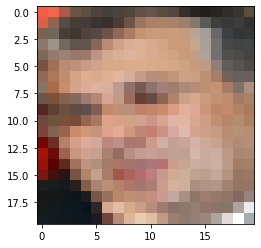

In [3]:
reimporter.reimport()
from data_processing.FDDB_loading import get_pickled_data
from utils.image_plotting import plot_image
train_faces, train_back, test_faces, test_back = get_pickled_data()

train_data = np.concatenate([train_faces, train_back], axis=0)
train_labels = np.concatenate([np.ones((len(train_faces),1)), np.zeros((len(train_back),1))], axis=0)

test_data = np.concatenate([test_faces, test_back], axis=0)
test_labels = np.concatenate([np.ones((len(test_faces),1)), np.zeros((len(test_back),1))], axis=0)

print(train_labels.shape)
print(train_data.shape)

print(test_labels.shape)
print(test_data.shape)
plot_image(train_data[0]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


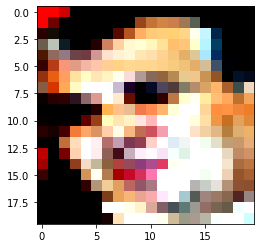

In [4]:
reimporter.reimport()
from data_processing.dataloader import DataLoader
train_dataloader = DataLoader(train_data, train_labels)
test_dataloader = DataLoader(test_data, test_labels)
image, label = train_dataloader[0]
plot_image(image)

In [15]:
reimporter.reimport()
from models.trainer import Trainer
trainer = Trainer("testing", None, train_dataloader, test_dataloader)
trainer.fit(epochs=100, lr=0.002, batch_size=32)

 Epoch 100/100, Train_loss: 0.0, Val_loss:0